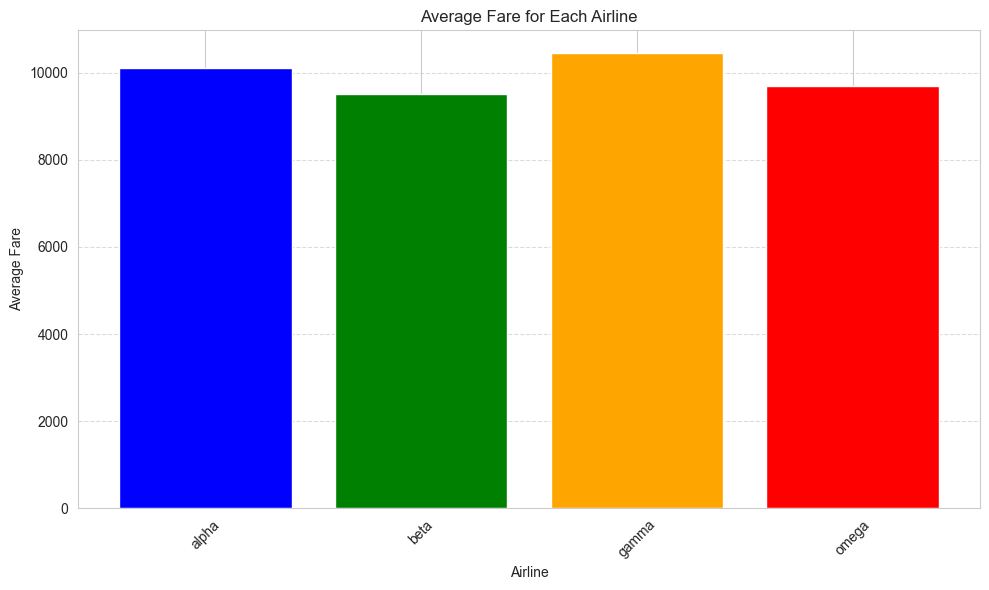

In [33]:
#GOAL 1: To calculate the average fare for each airline
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/S559361/Desktop/flight.csv.')


average_fare_by_airline = df.groupby('f6')['target'].mean().reset_index()


colors = ['blue', 'green', 'orange', 'red', 'purple']

# Plot the average fares for each airline with different colors
plt.figure(figsize=(10, 6))
plt.bar(average_fare_by_airline['f6'], average_fare_by_airline['target'], color=colors)
plt.xlabel('Airline')
plt.ylabel('Average Fare')
plt.title('Average Fare for Each Airline')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

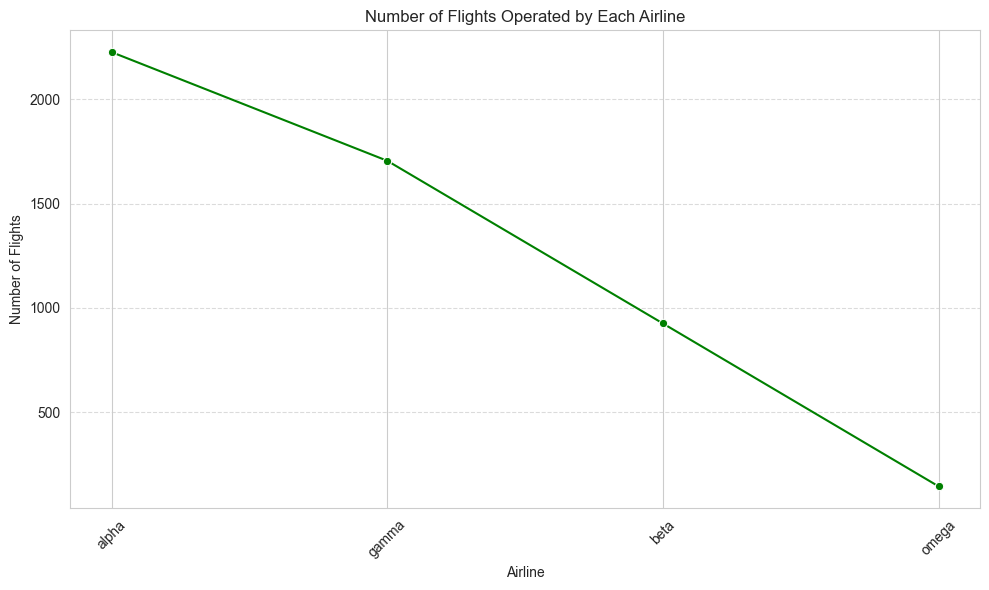

In [34]:
#GOAL-2 To determine the number of flights operated by each airline.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset into a pandas DataFrame
df = pd.read_csv('C:/Users/S559361/Desktop/flight.csv.')


flight_count_by_airline = df['f6'].value_counts().reset_index()
flight_count_by_airline.columns = ['Airline', 'Flight Count']

plt.figure(figsize=(10, 6))
sns.lineplot(data=flight_count_by_airline, x='Airline', y='Flight Count', marker='o', color='green')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Number of Flights Operated by Each Airline')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Routes with maximum fares significantly higher or lower than the average fare:
      f10    target_avg  target_max  fare_difference
0     a-1   9276.204280     32072.0     22795.795720
1    a-23  11522.075235     31145.0     19622.924765
2     a-5   9684.193784     23895.0     14210.806216
3     a-7  10136.746000     28245.0     18108.254000
4     a-9  10651.826590     31145.0     20493.173410
5     b-1   8978.560284     19474.0     10495.439716
6    b-19   9121.500000     13330.0      4208.500000
7   b-319  14484.000000     17760.0      3276.000000
10   b-69   9555.562992     20310.0     10754.437008
11   b-73   9664.833333     18130.0      8465.166667
12    b-9  10025.229773     20450.0     10424.770227
13    c-2  10264.580592     28185.0     17920.419408
14    c-4  10592.553957     32720.0     22127.446043
15    c-6  10524.907579     33720.0     23195.092421
16    d-1   9005.200000     22300.0     13294.800000
17    d-3   9870.409091     19000.0      9129.590909
18    d-5  10253.480

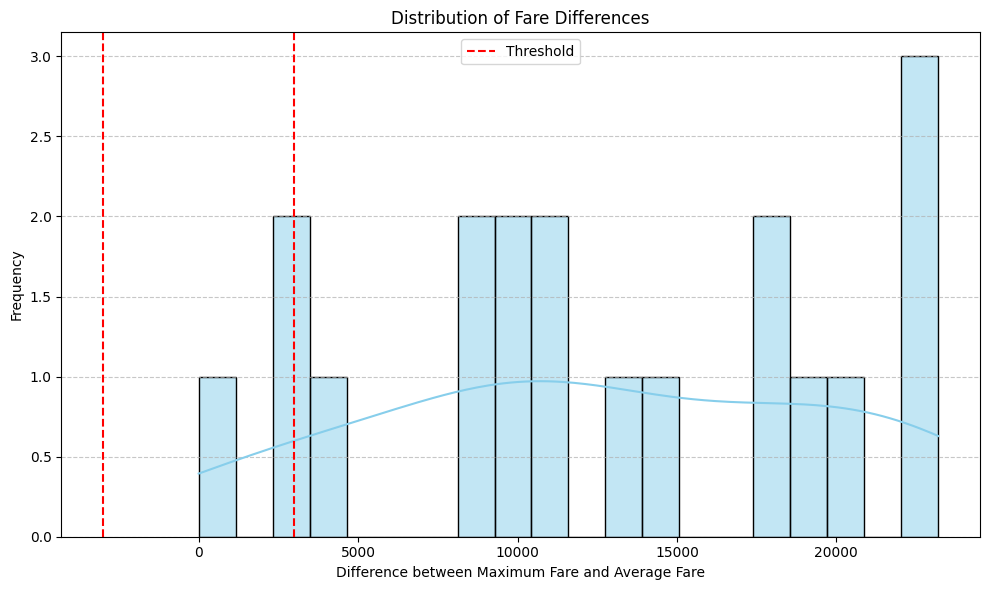

In [5]:
#Goal 3- To identify if there are any routes with a maximum fare significantly higher or lower than the average?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/S559361/Desktop/flight.csv.')

average_fare_by_route = df.groupby(['f10'])['target'].mean().reset_index()


max_fare_by_route = df.groupby(['f10'])['target'].max().reset_index()


fare_comparison = pd.merge(average_fare_by_route, max_fare_by_route, on='f10', suffixes=('_avg', '_max'))

fare_comparison['fare_difference'] = fare_comparison['target_max'] - fare_comparison['target_avg']


threshold = 3000


significant_routes = fare_comparison[fare_comparison['fare_difference'].abs() > threshold]


print("Routes with maximum fares significantly higher or lower than the average fare:")
print(significant_routes)


plt.figure(figsize=(10, 6))
sns.histplot(data=fare_comparison, x='fare_difference', bins=20, kde=True, color='skyblue')
plt.axvline(x=threshold, linestyle='--', color='red', label='Threshold')
plt.axvline(x=-threshold, linestyle='--', color='red')
plt.xlabel('Difference between Maximum Fare and Average Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Differences')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

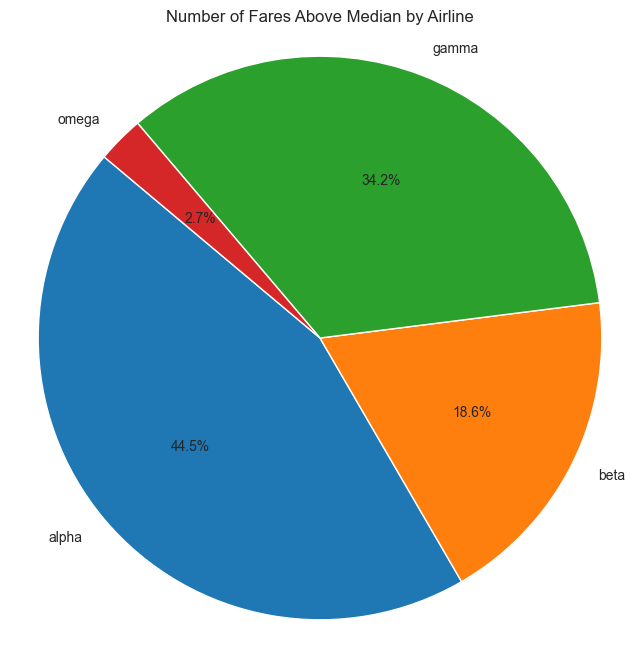

In [36]:
#Goal-4To identify the number of fares for each airline that are more than the median fare of that airline’s flights.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/S559361/Desktop/flight.csv.')


median_fare_by_airline = df.groupby('f6')['target'].median().reset_index()

df = pd.merge(df, median_fare_by_airline, on='f6', suffixes=('', '_median'))


df['more_than_median'] = df['target'] > df['target_median']


fares_above_median_count = df.groupby('f6')['more_than_median'].sum().reset_index()


plt.figure(figsize=(8, 8))
plt.pie(fares_above_median_count['more_than_median'], labels=fares_above_median_count['f6'], autopct='%1.1f%%', startangle=140)
plt.title('Number of Fares Above Median by Airline')
plt.axis('equal')  
plt.show()


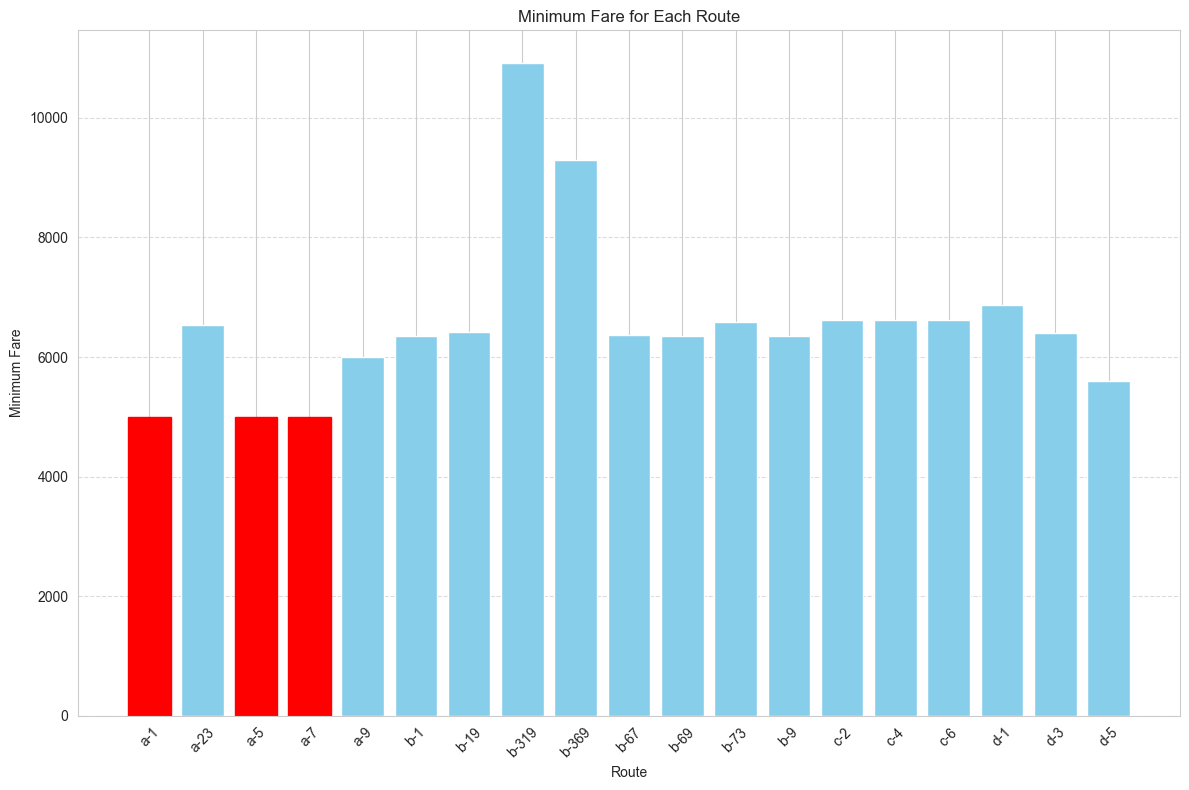

In [37]:
#Goal-5 To determine the minimum fare for each route.
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/S559361/Desktop/flight.csv.')


min_fare_by_route = df.groupby('f10')['target'].min().reset_index()

plt.figure(figsize=(12, 8))
bars = plt.bar(min_fare_by_route['f10'], min_fare_by_route['target'], color='skyblue')

# Highlight the minimum fare for each route in a different color
for i, bar in enumerate(bars):
    if min_fare_by_route['target'][i] == min(min_fare_by_route['target']):
        bar.set_color('red')
plt.xlabel('Route')
plt.ylabel('Minimum Fare')
plt.title('Minimum Fare for Each Route')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

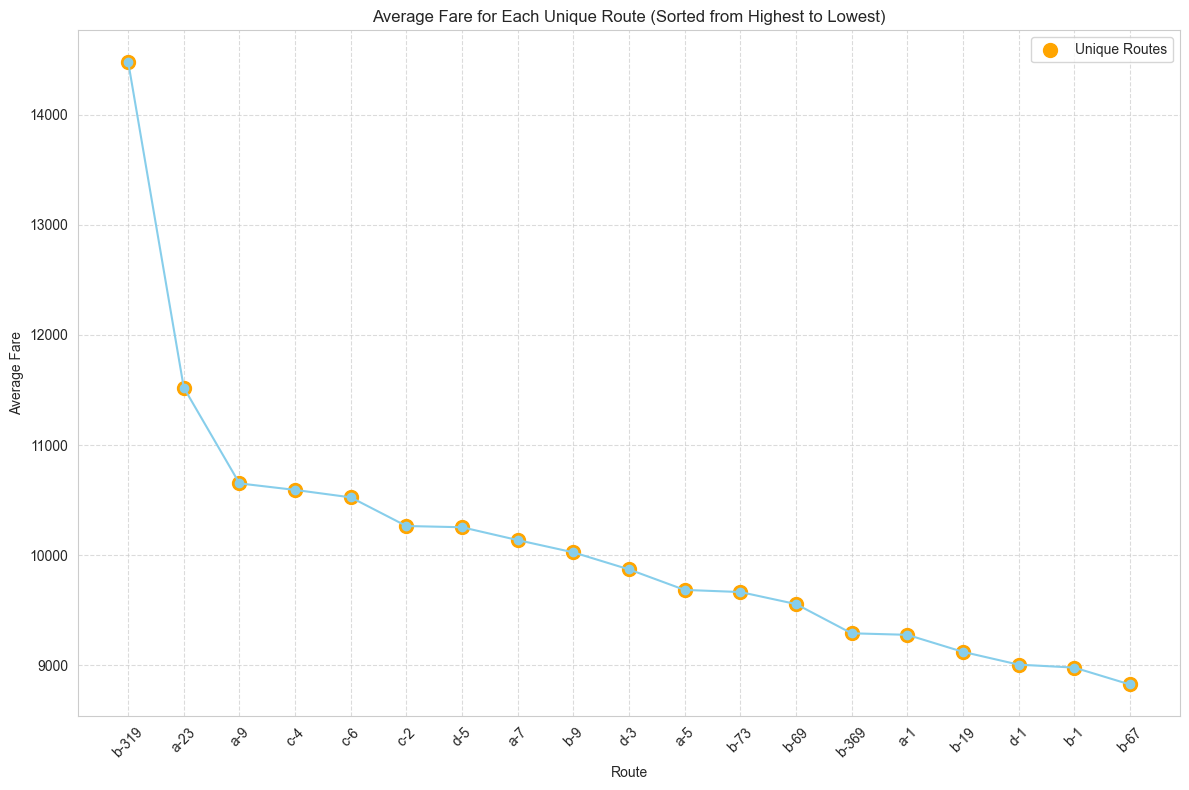

In [38]:
#Goal-6 To find the average fare for each unique route, sorted from highest to lowest.

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/S559361/Desktop/flight.csv.')


average_fare_by_route = df.groupby('f10')['target'].mean().reset_index()


average_fare_by_route = average_fare_by_route.sort_values(by='target', ascending=False)

plt.figure(figsize=(12, 8))
plt.plot(average_fare_by_route['f10'], average_fare_by_route['target'], marker='o', color='skyblue')


unique_routes = average_fare_by_route['f10'].unique()
for i, route in enumerate(unique_routes):
    plt.scatter(average_fare_by_route.loc[average_fare_by_route['f10'] == route, 'f10'], 
                average_fare_by_route.loc[average_fare_by_route['f10'] == route, 'target'],
                color='orange', s=100, label='Unique Routes' if i == 0 else '')

plt.xlabel('Route')
plt.ylabel('Average Fare')
plt.title('Average Fare for Each Unique Route (Sorted from Highest to Lowest)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()